In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## EXP WITH NOISE 

In [17]:
df0 = pd.read_csv("data/results_predict_all_0.0.txt", sep="\t")
df4 = pd.read_csv("data/results_predict_all_0.004.txt", sep="\t")
df8 = pd.read_csv("data/results_predict_all_0.008.txt", sep="\t")
df12 = pd.read_csv("data/results_predict_all_0.012.txt", sep="\t")
df16 = pd.read_csv("data/results_predict_all_0.016.txt", sep="\t")
df20 = pd.read_csv("data/results_predict_all_0.02.txt", sep="\t")


df = pd.concat((df0, df4, df8, df12, df16, df20), ignore_index=True)

In [18]:
print(df[df["col"] == -2].shape[0])
df = df[df["col"] != -2]

18


In [19]:
df[df["col"] != 0] #all colisions

,scene_id,sigma,col,noise_norm,ade,fde
119,39,0.000,1,0.000000,0.348683,0.623938
143,47,0.000,1,0.000000,0.282354,0.810002
317,105,0.000,1,0.000000,1.460181,3.883822
323,107,0.000,1,0.000000,2.007343,4.037057
350,116,0.000,1,0.000000,1.750261,3.631921
...,...,...,...,...,...,...
10373,346,0.012,1,0.010905,1.182992,2.702620
11305,812,0.012,1,0.012629,0.849438,1.716839
11466,892,0.012,1,0.013146,0.940340,2.331965
12235,1417,0.012,1,0.010037,0.877529,1.727276


In [20]:
df_mean = df.groupby("sigma")[["col", "fde", "ade"]].mean()
df_mean

,col,fde,ade
sigma,,,
0.000,0.040725,1.144239,0.530816
0.004,0.007954,1.147034,0.533198
0.008,0.003500,1.151888,0.536585
0.012,0.001273,1.155852,0.541811
0.016,0.000000,1.167330,0.548698
0.020,0.000318,1.180124,0.558485


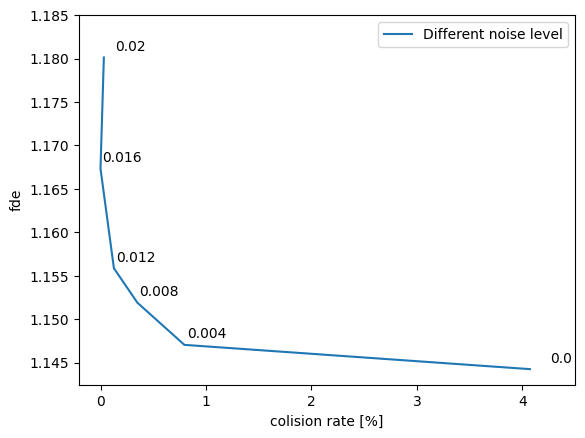

In [21]:
x = df_mean["col"]*100
y = df_mean["fde"]
plt.plot(x, y, label="Different noise level")
plt.ylabel("fde")
plt.xlabel("colision rate [%]")

plt.ylim(top = 1.185)
plt.xlim(right = 4.5)

#plt.axvline(0, color = "k")

plt.legend()



for i, (x,y) in enumerate(zip(x,y)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')

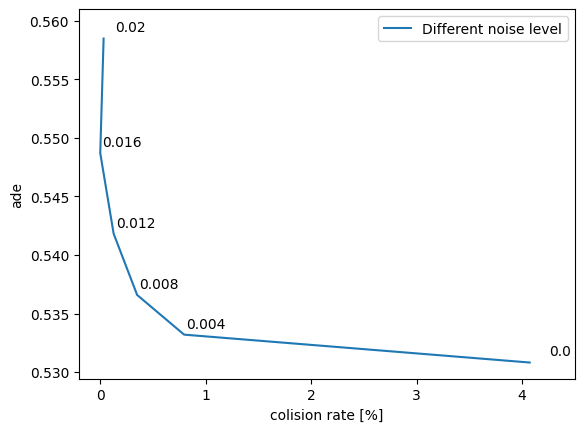

In [22]:
x1 = df_mean["col"]*100
y1 = df_mean["ade"]
plt.plot(x1, y1, label="Different noise level")
plt.ylabel("ade")
plt.xlabel("colision rate [%]")

plt.ylim(top = 0.561)
plt.xlim(right = 4.5)

#plt.axvline(0, color = "k")

plt.legend()

for i, (x1,y1) in enumerate(zip(x1,y1)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x1,y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')